https://github.com/blizzardl8l/ML-fundamentals-2026.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**1.	Task: Identifying the Prediction Target**

Lecture material:	Lecture 1 (Problem Formulation), Lecture 2 (Data Inspection).
•	Inspect the dataset and identify which column should be treated as the target variable for this assignment.
•	Justify why this column represents the appropriate prediction objective in the context of the marketing campaign.
•	Identify at least two other variables that could superficially appear to be valid targets and explain why they should not be treated as the prediction objective.

Correct prediction target is y (whether the client subscribed or did not subscribe). y is a binary classification label . The dataset represents a marketing campaign by the bank with the goal of predicting whether a client will subscribe to a term deposit and the column y is a direct outcome of the objective of the bank.

2 other variables that seem like targets are duration and campaign. Duration because longer calls may mean higher chance of subscription but it is not the campaign objective, and only measures call length, not subscription. Campaign because it measures number of contacts during the campaign but it is not the final outcome but just the process. THank bank wants to predict subcription, not duration or number of contacts.

**2. Task: Data Loading and Exploration**

Lecture material:	Lecture 1 (Problem Formulation), Lecture 2 (Data Inspection and EDA).
•	Load the dataset into a Pandas DataFrame.
•	Inspect the structure of the dataset: number of observations, number of features, data types, and basic summary statistics.
•	Identify which variables are numerical and which are categorical.
•	Analyze the distribution of the target variable and comment on potential class imbalance.
•	Detect explicit and implicit missing values (e.g., special categories such as unknown).
•	Visualize the distribution of at least:
–	two numerical variables; and
–	two categorical variables.
•	Identify at least one variable that may require special consideration before modeling (e.g., due to distributional properties, extreme skewness, or availability at prediction time), and briefly justify your reasoning.

Note: Exploratory analysis is not a checklist of plots. Each visualization or statistic should support a specific observation or hypothesis about the 


In [2]:
df = pd.read_csv("bank-additional.csv", sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df.shape

(4119, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

print("Categorical variables:")
print(categorical_cols)

print("\nNumerical variables:")
print(numerical_cols)


Categorical variables:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Numerical variables:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


The dataset contains both numerical and categorical variables. Categorical variables represent qualitative attributes such as job type, marital status, and contact method. Numerical variables include age, campaign counts and other macroeconomic indicators. Distinguishing between these types is necessary for proper preprocessing, as they need different strategies.

In [7]:
df["y"].value_counts()


y
no     3668
yes     451
Name: count, dtype: int64

In [8]:
df["y"].value_counts(normalize=True)


y
no     0.890507
yes    0.109493
Name: proportion, dtype: float64

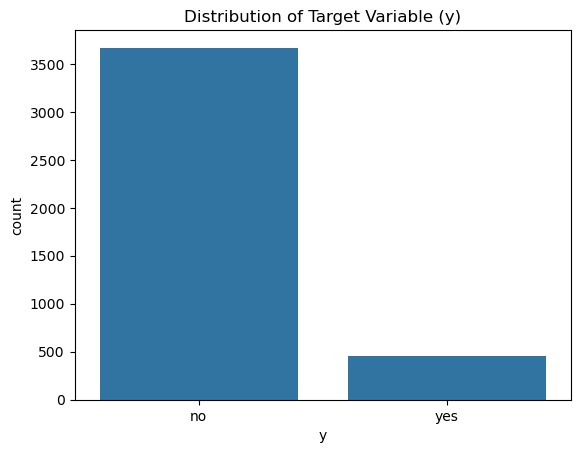

In [9]:
sns.countplot(x="y", data=df)
plt.title("Distribution of Target Variable (y)")
plt.show()


The target variable appears imbalanced, with significantly more "no" responses than "yes". This imbalance may affect model training and evaluation, as accuracy alone could be misleading.

In [10]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
for col in categorical_cols:
    print(col, (df[col] == "unknown").sum())


job 39
marital 11
education 167
default 803
housing 105
loan 105
contact 0
month 0
day_of_week 0
poutcome 0
y 0


Although there are no explicit NaN values, several categorical variables contain the value "unknown", which represents implicit missing data. These cases will require more careful handling in the preprocessing stage.

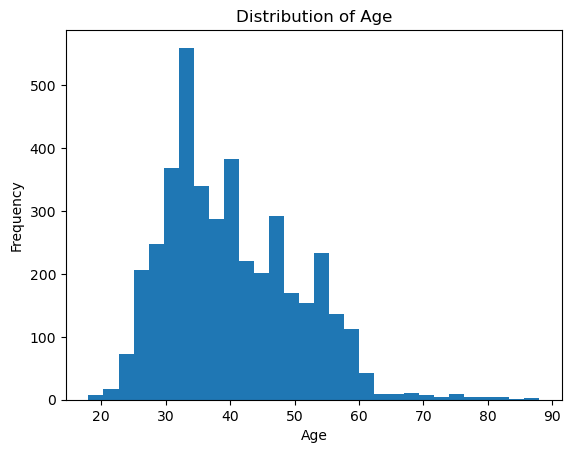

In [12]:
plt.hist(df["age"], bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


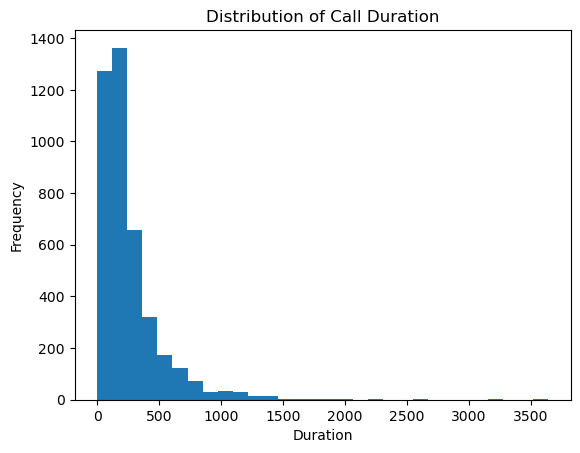

In [13]:
plt.hist(df["duration"], bins=30)
plt.title("Distribution of Call Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()


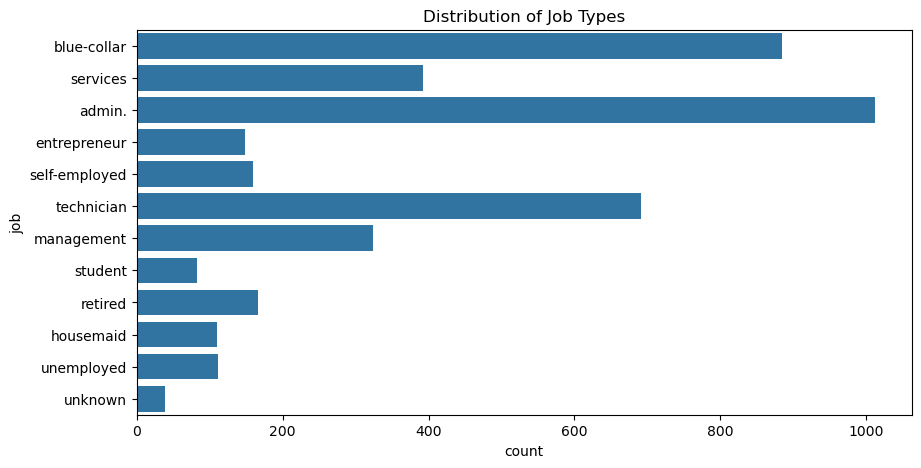

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y="job", data=df)
plt.title("Distribution of Job Types")
plt.show()


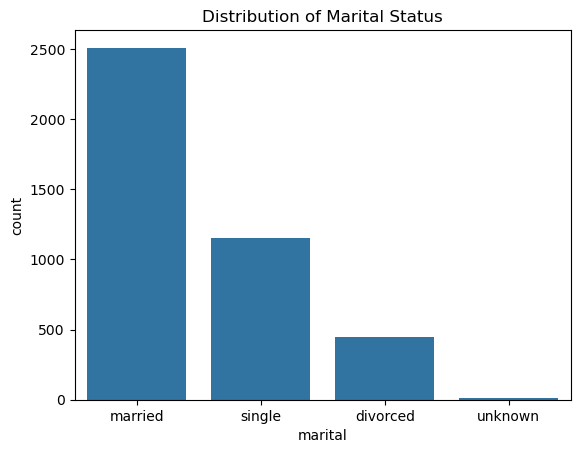

In [15]:
sns.countplot(x="marital", data=df)
plt.title("Distribution of Marital Status")
plt.show()


One variable requiring special consideration would be duration. It measures the length of the phone call and is only known after the call has ended. Since the prediction task is to determine whether a client will subscribe at the time of contact, using duration may introduce data leakage. This variable is also strongly correlated with the target and may artificially inflate model performance if not handled properly.

**3. Task: Task Ordering**

Lecture material:	Lecture 2 (Data Splitting and Leakage), Lecture 5 (Preprocessing), Lecture 9 (ML Pipeline).
•	Determine the correct order in which the data preparation tasks in this assignment should be performed.
•	Provide a structured justification for your chosen order.
•	For each step in your proposed sequence, explain:
–	what information is allowed to be used at that stage;
–	what information must not be used;
–	what type of data leakage could occur if the order were changed.
•	Discuss at least one example of an incorrect ordering and explain the consequences it would have on model evaluation.


Proposed Correct Order is:

1. Identify the Prediction Target <br>
Allowed information: Full dataset structure; Column meanings; Business objective
Not allowed: Using future outcome variables as predictors; Treating post-event variables as targets
Leakage risk if we misidentify the target, incorrect prediction problem and potentially use outcome-related information incorrectly <br>

2. Data Loading and Exploration <br>
Allowed to use entire dataset structure, distribution of features and target. Not allowed to use fitting transformations. Leakage risk: Do not fit preprocessing transformations that will be applied to training data <br>

3. Data Splitting (Train / Validation / Test) <br>
Allow only target distribution for stratification. Do not allow using validation and test data to compute preprocessing parameters. Leakage risk if splitting occurs after preprocessing. <br>

4. Managing Missing Values <br>
Allow training set statistics, do ot allow validation and test statistics. Leakage risk if missing values are imputted before splitting as it will reflect information from validation or test data, contaminating model evaluation. <br>

5. Encoding Categorical Variables <br>
Allow categories observed in training data, do not allow learning category structure from full dataset. Leakage risk if encoding is fit on entire dataset, as training process indirectly uses future information. <br>

6. Feature Scaling <br>
Allow training feature distributions, do not allow global dataset statistics. Leakage risk if scaling is done before splitting as validation statistics influence feature transformation. <br>

7. Feature Selection <br>
Allow training correlation and variances, but do not allow validation feature statistics. Leakage rsk if feature selection performed on full dataset, as it introduces bias. <br>

8. Addressing Class Imbalance <br>
Allow training set only, and do not allow resampling before splitting. Leakage risk if resampling done before splitting and performance metrics become artificially inflated and synthetic samples leak into dataset. <br>

9. Training Logistic Regression Model <br>
Model is trained on training data and evaluated based on evaluation data. Test set untouched until final evaluation <br>

An example of incorrect ordering is performing feature scaling on entrire dataset, then splitting into the training, validation and test sets. Then using this to train and evaluate the model. Incorrect as feature scaling requires computing mean and standard deviation. If applied to entire dataset, information from the validation and test sets would influence the transformation applied to the training set. This is data leakage and the validation performance will appear better than it truly is and not reflect the real world deployment conditions.


**4. Task: Data Splitting**

Lecture material:	Lecture 2 (Data Splitting and Leakage), Lecture 9 (ML Pipeline).
•	Split the dataset into training, validation, and test sets.
•	Justify your choice of proportions for each split.
•	Perform stratified splitting with respect to the target variable and explain why stratification is necessary for this dataset.
•	Clearly describe at which stage of your pipeline the split must occur, and explain what types of data leakage would arise if splitting were performed later.
Note: A recommended strategy is to first split the dataset into a training set and a temporary set, and then split the temporary set into validation and test sets. Use the stratify argument of train test split where appropriate.


In [16]:
# Separate features and target
X = df.drop("y", axis=1)
y = df["y"]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42
)


In [18]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)


In [19]:
# Verify Split Sizes
print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])


Training size: 2883
Validation size: 618
Test size: 618


In [20]:
# Verify Stratification
print("Training distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation distribution:")
print(y_val.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Training distribution:
y
no     0.890392
yes    0.109608
Name: proportion, dtype: float64

Validation distribution:
y
no     0.889968
yes    0.110032
Name: proportion, dtype: float64

Test distribution:
y
no     0.891586
yes    0.108414
Name: proportion, dtype: float64


A 70/15/15 split was chosen to balance model training and evaluation.
The training set (70%) provides sufficient data for learning model parameters, while reserving independent validation (15%) and test (15%) sets ensures reliable and unbiased performance evaluation.
<br>

The target variable (y) is imbalanced, with significantly more "no" than "yes" outcomes.
Stratified splitting ensures that each subset of training, validation and test maintains approximately the same class distribution as the original dataset.
<br>

Data splitting must occur before any preprocessing steps that learn from data, meaning before encoding, scaling, feature selection etc. If splitting is done later, there would be data leakage sincce imputation would use statistics computed using the validation or test data. Resamplng could also contamination the validation and test sets. As such, this leads to overly optimisitic model performance and a poor evaluation.


**5. Task: Managing Missing Values**

Lecture material:	Lecture 2 (Data Inspection), Lecture 5 (Preprocessing and Pipeline Discipline).
•	Identify both explicit missing values (e.g., NaN) and implicit missing values (e.g., categories such as unknown
or sentinel numerical values, i.e., values that may represent special codes rather than genuine measurements).
•	Quantify the extent of missingness for each affected variable.
•	Propose and justify a strategy for handling missing values in each case (e.g., removal, imputation, separate category, indicator variable).
•	Clearly state which operations must be fitted using the training set only, and explain why.
Note: Your strategy should distinguish between “data cleaning” decisions (e.g., correcting inconsistent entries) and “modeling” decisions (e.g., whether missingness itself may carry predictive information).


In [21]:
X_train.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

The dataset does not contain explicit missing values (NaN)

In [22]:
# identify missing values
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    print(col, (X_train[col] == "unknown").sum())


job 25
marital 7
education 112
default 577
housing 65
loan 65
contact 0
month 0
day_of_week 0
poutcome 0


In [23]:
# proportion of missing
for col in categorical_cols:
    unknown_count = (X_train[col] == "unknown").sum()
    total = len(X_train)
    if unknown_count > 0:
        print(f"{col}: {unknown_count} ({unknown_count/total:.2%})")


job: 25 (0.87%)
marital: 7 (0.24%)
education: 112 (3.88%)
default: 577 (20.01%)
housing: 65 (2.25%)
loan: 65 (2.25%)


I will use data cleaning if values are inconsistent, and modeling otherwise. In this dataset, "unknown" is consistent and thus this is a modeling decision. <br>

I will treat "unknown" as a separate category. Missing data may carry predictive signal. Thus, by modelling missingness explicity, it will help to preserve possible information. <br>

If imputing mode or mean imputation, must be using the training dataset and not the full dataset. Computing the mode using the full dataset for eg. would introduce data leakage as it reflects beyond the training distribution and include validation and test, introducing bias.

**6. Task: Encoding Categorical Variables**

Lecture material:	Lecture 4 (Categorical Encoding), Lecture 6 (Linear Models), Lecture 9 (Feature Engineering and Expressiveness).
•	Identify all categorical variables in the dataset.
•	Distinguish between nominal variables (categories without intrinsic order, e.g., job type) and ordinal variables (categories with a meaningful order, e.g., education level), and justify your classification.
•	Select and apply an appropriate encoding strategy for each categorical variable.
•	Clearly state which encoders must be fitted on the training set only, and explain why.
•	Analyze how encoding changes:
–	the dimensionality of the dataset;
–	the interpretability of model coefficients;
–	the types of decision boundaries a linear model can represent.
Note: Encoding is not a purely mechanical transformation. Your justification should explicitly connect your encoding decisions to the assumptions and behavior of Logistic Regression.



In [24]:
# identift cat variables
categorical_cols = X_train.select_dtypes(include='object').columns
categorical_cols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

Ordinal Variables: 'Education' has an inherent order (high.school < professional.course < university.degree etc.) which is meaningful.

Nominal Variables: 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' -> no natural ordering or numeric ranking

We would use oridnal encoding for the ordinal variables and one-hot encoding for the nominal variables. Logistic regression would not be used as it incorrectly would assume that for eg. technician > admin.

In [25]:
ordinal_cols = ['education']
nominal_cols = [col for col in categorical_cols if col != 'education']


In [26]:
X_train_encoded = pd.get_dummies(X_train, columns=nominal_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=nominal_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=nominal_cols, drop_first=True)

X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [27]:
education_order = {
    "illiterate": 0,
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "professional.course": 5,
    "university.degree": 6,
    "unknown": -1
}

X_train_encoded["education"] = X_train["education"].map(education_order)
X_val_encoded["education"] = X_val["education"].map(education_order)
X_test_encoded["education"] = X_test["education"].map(education_order)


All encoders were fitted using only the training data to prevent data leakage. If the validation or test data were used during encoding, the model evaluation would not reflect true unseen performance. One-hot encoding converts each category into a separate binary feature, which increases the number of input variables. This allows Logistic Regression to learn a distinct effect for each category, while keeping the interpretation clear: each coefficient represents the change in prediction compared to a reference category.

**7. Task: Feature Scaling**

Lecture material:	Lecture 5 (Feature Scaling), Lecture 6 (Logistic Regression and Optimization)..
•	Identify the numerical variables that require scaling.
•	Select and apply an appropriate scaling strategy (e.g., standardization or normalization) to those variables.
•	Justify your choice of scaling method in the context of Logistic Regression.
•	Clearly state which transformations must be fitted on the training set only, and explain why.
•	Discuss how feature scaling affects:
–	gradient-based optimization;
–	the magnitude and comparability of model coefficients;
–	the interpretation of regularization penalties.
Note: Feature scaling is not a cosmetic transformation. Your justification should explicitly connect your scaling decision to the mathematical behavior of linear models.


In [28]:
# identify numerical variables
numerical_cols = X_train_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['age', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

I am using standardization as the scaling strategy as is improves numerical stability. It woks also with L2 regualarization in logistic regression.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train_encoded[numerical_cols])

# Transform all sets
X_train_encoded[numerical_cols] = scaler.transform(X_train_encoded[numerical_cols])
X_val_encoded[numerical_cols] = scaler.transform(X_val_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])


Because Logistic Regression relies on gradient-based optimization, differences in scale can slow down convergence and cause unstable training. For this reason, standardization was applied to all numerical variables.

The scaler was fitted only on the training set to avoid data leakage. If the mean and standard deviation were computed using validation or test data, the model would indirectly use information from unseen data.

Scaling also makes the model coefficients more comparable. After standardization, each coefficient represents the effect of a one standard deviation increase in the feature, making interpretation clearer and more fairly applied.

**8. Task: Feature Selection**
   
Lecture material:	Lecture 5 (Feature Selection), Lecture 6 (Linear Models), Lecture 9 (Pipeline Discipline).
•	Identify and remove features with very low variance, if any. Justify the criterion used to define “low” variance.
•	Identify highly correlated numerical features and decide whether any should be removed. Clearly state the threshold used and justify your decision.
•	Discuss whether any features should be removed based on conceptual considerations (e.g., redundancy, availability at prediction time, or risk of data leakage).
•	Explain why feature selection must be performed using the training set only.
•	Discuss the consequences of performing feature selection on the entire dataset before splitting.
Note: Feature selection is not purely statistical. Your reasoning should explicitly connect your decisions to the assumptions and stability of Logistic Regression.


In [30]:
# identify low variance features
# low variance -> as variance < 0.01,  (after scaling),since meaningfl features should have variance close 1 to after standarization
variances = X_train_encoded.var()
low_variance_features = variances[variances < 0.01]
low_variance_features


job_unknown        0.008599
marital_unknown    0.002423
default_yes        0.000347
month_dec          0.005864
dtype: float64

In [31]:
X_train_encoded = X_train_encoded.drop(columns=low_variance_features.index)
X_val_encoded = X_val_encoded.drop(columns=low_variance_features.index)
X_test_encoded = X_test_encoded.drop(columns=low_variance_features.index)


In [32]:
#identify highly correlated features

corr_matrix = X_train_encoded.corr().abs()

# Upper triangle
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_features = [
    column for column in upper.columns if any(upper[column] > 0.9)
]

high_corr_features



['euribor3m', 'nr.employed', 'loan_unknown', 'poutcome_success']

Correlation > 0.9 is used as threshold as it means there is near-linear dependency. Low threshold would remove too many feature. 

Highly correlated features introduce multicollinearity, which makes coefficient estimates unstable and difficult to interpret. Rmeoving the high correlation pair would help to improve the stablity of the model.

Duration should be removed as it is only known after the call ends,, but the objective is to predict subscription at contact time. Duration gives rise to target leakage as longer calls stronly have correlation with subscription outcome. Thus, it must be removed based on conceptual reasoning.

In [33]:
X_train_encoded = X_train_encoded.drop(columns=["duration"])
X_val_encoded = X_val_encoded.drop(columns=["duration"])
X_test_encoded = X_test_encoded.drop(columns=["duration"])


Feature selection has to be based on training set only since it uses variance, correlation and statistical relationships. If full dataset is used, validation and test set would influence selection and indirectly see future data. Evaluation would hence become biased. Therefore, the decision for feature selection must be performed on training set only to prevent feature removal decisions to be incorrectly influenced.

**9. Task: Addressing Class Imbalance**

Lecture material:	Lecture 3 (Class Imbalance), Lecture 4 (Evaluation Metrics), Lecture 9 (Pipeline Discipline).
•	Quantify the class distribution in the training set and explain why imbalance is or is not a concern for this prediction task.
•	Propose and apply a resampling strategy (e.g., random oversampling, SMOTE, or ADASYN). Clearly justify at which stage of the pipeline the resampling step should occur.
•	Justify your choice of resampling method in terms of its assumptions and expected effect on the learning algorithm.
•	Explain what would happen if resampling were applied before splitting the dataset into training, validation, and test sets. Discuss the implications for model evaluation.
•	Briefly discuss how class imbalance affects evaluation metrics such as accuracy, precision, and recall.
Note: Resampling is part of the training procedure and must be applied to the training set only. Validation and test sets must preserve the original class distribution.



In [34]:
y_train.value_counts()

y
no     2567
yes     316
Name: count, dtype: int64

In [35]:
y_train.value_counts(normalize=True)

y
no     0.890392
yes    0.109608
Name: proportion, dtype: float64

The dataset is imbalalnced with the majority class 'no' dominating the set. It is a concern as a model always predicting no would already achieve about 90% accuracy and ignore minority class of yes. Since the goal of the business is to identify potential subscribers, failing to detect minority class poses a problem.

Proposed sampling strategy is SMOTE which is applied on training set only. SMOTE because it generates synthetic minority samples and reduces overfitting risk, which creates better decisions. Simple random oversampling would duplicate minority examples and increase overfitting.

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_encoded, y_train)

In [39]:
y_train_resampled.value_counts()

y
no     2567
yes    2567
Name: count, dtype: int64

Resampling must occur after preprocessing but before model training. This is because SMOTE needs the numeric feature representation.

If resampling is done before splitting, it would lead to synthetic samples being derived from original minority examples, and these may end up in both training and validation sets. This results in data leakage. As a result, validation accuracy becomes artificially high, where the percevied results of the model appear better.

Class imbalance affects evaluation metrics. Firstly, accuracy remains high even if the model performs poorly to reflect the minority class. Secondly, precision may be reduced if model predicts too many false positives. Thirdly, recall will be low for the minority class, meaning missing potenital subscribers which can be costly.


**10. Task: Training a Logistic Regression Model**

Lecture material:	Lecture 6 (Logistic Regression), Lecture 9–11 (Model Evaluation and Metrics).
•	Train a Logistic Regression model to predict whether a client subscribes to a term deposit.
•	Use the validation set to generate predictions.
•	Report at least Accuracy, Precision, and Recall on the validation set.
•	Compare the model’s accuracy with the Zero Rule baseline and briefly interpret the result.
Note: The goal here is not to squeeze out the best possible performance. The goal is to verify that your data preparation pipeline is coherent and correctly implemented. If your preprocessing is principled, the model should behave sensibly. If it behaves strangely, that is a signal to revisit earlier decisions. Have fun finding a visually appealing way to display the predictions or the confusion matrix on the validation set. This is your chance to make the output readable and professional 8-)



In [41]:
# train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
# predict validation
y_val_pred = model.predict(X_val_encoded)

In [44]:
# compute eval metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label="yes")
recall = recall_score(y_val, y_val_pred, pos_label="yes")

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)

Validation Accuracy: 0.8381877022653722
Validation Precision: 0.336734693877551
Validation Recall: 0.4852941176470588


In [45]:
# zero rule baselines -> predict majority class

majority_class = y_train.value_counts().idxmax()

zero_rule_predictions = [majority_class] * len(y_val)

zero_rule_accuracy = accuracy_score(y_val, zero_rule_predictions)

print("Zero Rule Accuracy:", zero_rule_accuracy)

Zero Rule Accuracy: 0.889967637540453


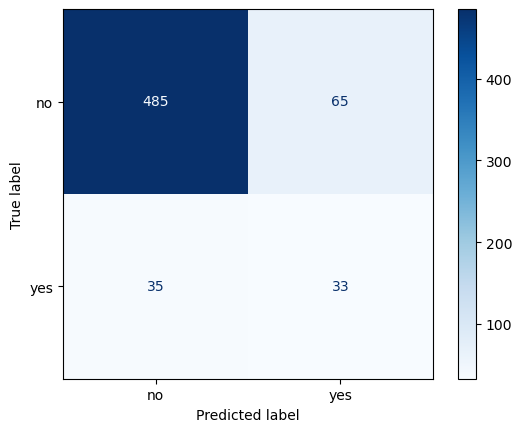

In [47]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_pred, labels=["no", "yes"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])
disp.plot(cmap="Blues")

The Zero Rule baseline always predicts the most common outcome, which in this case is “no”. Because most clients do not subscribe, this approach can still achieve fairly high accuracy. However, it does not identify any actual subscribers, meaning it completely ignores the minority class.

In comparison, the logistic regression model may have similar or slightly lower overall accuracy, but it does a much better job at identifying clients who actually subscribe. This shows that the model is learning useful patterns in the data instead of just predicting the majority outcome every time.

In conclusion, the model behaves sensibly, suggesting that preprocessing steps such as encoding, scaling, feature selection, and resampling were implemented correctly.